In [1]:
import os  # OS library can be used for reading folders,sub-folders or files inside a directory.
import cv2  #for image processing                                
import tensorflow as tf              
import numpy as np
import matplotlib.pyplot as plt             
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
from tqdm import tqdm  # Can be used as a progress tracker

/home/TechnoDesk/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/TechnoDesk/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/TechnoDesk/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/TechnoDesk/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [3]:
paths = ['/home/TechnoDesk/Desktop/Excelr/AI$DL/algorithm/archive(1)/seg_train/seg_train', '/home/TechnoDesk/Desktop/Excelr/AI$DL/algorithm/archive(1)/seg_test/seg_test']

In [4]:
def load_data(paths):
    output = []
    
    #Iterating through Train & Test Data Set.
    for path in paths:
        
        images = []
        labels = []
        
        print("Loading Started for ",path)
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(path):   # 6 times for each folder
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            # Example Path: ../Data/seg_train/seg_train/buildings
            for file in tqdm(os.listdir(os.path.join(path, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(path, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data(paths)

Loading Started for  /home/TechnoDesk/Desktop/Excelr/AI$DL/algorithm/archive(1)/seg_train/seg_train


 83%|████████▎ | 1993/2404 [00:19<00:03, 104.91it/s]

In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [10]:
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [11]:
model_scratch.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model_scratch.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.15)

Train on 11928 samples, validate on 2106 samples
Epoch 1/20
11928/11928 [==============================] - 11s 900us/sample - loss: 1.1603 - accuracy: 0.5556 - val_loss: 0.8834 - val_accuracy: 0.6610
Epoch 2/20
11928/11928 [==============================] - 6s 518us/sample - loss: 0.7556 - accuracy: 0.7181 - val_loss: 0.7594 - val_accuracy: 0.7151
Epoch 3/20
11928/11928 [==============================] - 6s 516us/sample - loss: 0.6200 - accuracy: 0.7730 - val_loss: 0.6274 - val_accuracy: 0.7673
Epoch 4/20
11928/11928 [==============================] - 6s 523us/sample - loss: 0.5082 - accuracy: 0.8231 - val_loss: 0.7053 - val_accuracy: 0.7393
Epoch 5/20
11928/11928 [==============================] - 6s 522us/sample - loss: 0.3907 - accuracy: 0.8626 - val_loss: 0.6842 - val_accuracy: 0.7559
Epoch 6/20
11928/11928 [==============================] - 6s 529us/sample - loss: 0.2562 - accuracy: 0.9124 - val_loss: 0.6457 - val_accuracy: 0.7821
Epoch 7/20
11928/11928 [==========================

In [13]:
test_loss = model_scratch.evaluate(test_images, test_labels)

3000/3000 [==============================] - 1s 358us/sample - loss: 1.2311 - accuracy: 0.7670


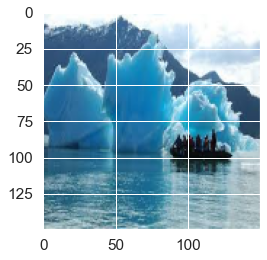

In [27]:
image = cv2.imread("../Data/Evaluate/gla_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
plt.imshow(image)

In [28]:
evaluate_image = [image]
                
images = np.array(evaluate_image, dtype = 'float32')

In [29]:
model_scratch.predict(images)

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
pred_labels = np.argmax(model_scratch.predict(images), axis = 1)

In [31]:
print(pred_labels)

[2]


In [32]:
for class_name in class_names_label:
    if class_names_label[class_name] == pred_labels:
        print (class_name)

glacier
